In [2]:
!pip install pulp

Looking in indexes: https://pypi.python.org/simple


In [3]:
import pulp

In [8]:
from pulp import LpMaximize, LpProblem, LpStatus, lpSum, LpVariable

model = LpProblem(name="cake-problem", sense=LpMaximize)
x = LpVariable(name="c", lowBound=0)
y = LpVariable(name="p", lowBound=0)

obj_func = 75 * x + 40 * y
model += obj_func

model += (6 * x + 4 * y <= 155, "flour_constraint")
model += (4 * x + 3 * y <= 80, "time_constraint")

In [9]:
model

cake-problem:
MAXIMIZE
75*c + 40*p + 0
SUBJECT TO
flour_constraint: 6 c + 4 p <= 155

time_constraint: 4 c + 3 p <= 80

VARIABLES
c Continuous
p Continuous

In [10]:
status = model.solve()


In [11]:
print(f"status: {model.status}, {LpStatus[model.status]}")

status: 1, Optimal


In [12]:
for var in model.variables():
    print(f"{var.name}: {var.value()}")

c: 20.0
p: 0.0


Text(0, 0.5, '$y$')

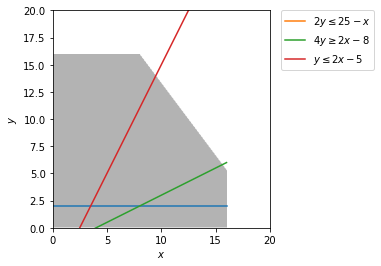

In [30]:
import matplotlib.pyplot as plt

d = np.linspace(-2,16,300)
x,y = np.meshgrid(d,d)
plt.imshow( ((x>=0) & (6 * x + 4 * y <= 155) & (4 * x + 3 * y <= 80) & (y>=0)).astype(int) , 
                extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Greys", alpha = 0.3);


# plot the lines defining the constraints
x = np.linspace(0, 16, 500)
# y >= 2
y1 = 155- (6/4*x)
# 2y <= 25 - x
y2 = (80-4/3*x)
# 4y >= 2x - 8 
# y3 = 0 (2*x-8)/4.0
# y <= 2x - 5 
# y4 = 2 * x -5

# Make plot
plt.plot(x, 2*np.ones_like(y1))
plt.plot(x, y2, label=r'$2y\leq25-x$')
plt.plot(x, y3, label=r'$4y\geq 2x - 8$')
plt.plot(x, y4, label=r'$y\leq 2x-5$')
plt.xlim(0,20)
plt.ylim(0,20)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')